In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

In [2]:
N12h_path = "/home/cjkeerthana/Documents/Parallel_Programming/ParallelProgramming/Ex5/MPI_OpenMP_hybrid/output/1200"
N12k_path = "/home/cjkeerthana/Documents/Parallel_Programming/ParallelProgramming/Ex5/MPI_OpenMP_hybrid/output/12000"
os.listdir(N12h_path)
os.listdir(N12k_path)

['4_hybrid.txt',
 '32_hybrid.txt',
 '2_hybrid.txt',
 '16_hybrid.txt',
 '8_hybrid.txt']

In [3]:
def read_text_file(file_path):
    with open(file_path, 'r') as f:
        time = 0
        for line in f.readlines():
                t = re.findall(r"[-+]?\d*\.\d+|\d+", line)
                time = time + float(t[1])
        return time

In [4]:
def read_all_times(dir_path):
    times = []
    for file in os.listdir(dir_path):
    # Check whether file is in text format or not
        if file.endswith(".txt"):
            file_path = dir_path + "/" + file 
            name = file.split("_")
            avg_time = read_text_file(file_path)
            avg_time = avg_time/int(name[0])
            times.append((int(name[0]),avg_time))
    times.sort()
    procs = []
    tempo = []
    for e in times:
        a,b = e
        procs.append(a)
        tempo.append(b)
    return tempo

In [5]:
def separate_times(totTime, commTime, calcTime, dumpTime):
    totTime = np.asarray(totTime)
    commTime = np.asarray(commTime)
    calcTime = np.asarray(calcTime)
    commTime = commTime - calcTime
    calcTime = totTime - dumpTime - commTime
    return totTime,commTime,calcTime,dumpTime

In [6]:
def make_plots_times(title, labels, commTime, calcTime, dumpTime):
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    fig, ax = plt.subplots(figsize=(20, 10))
    rects1 = ax.bar(x, calcTime, width, label='CalcTime')
    rects2 = ax.bar(x, commTime, width, bottom=calcTime, label='CommTime')
    rects3 = ax.bar(x, dumpTime, width, bottom=calcTime+commTime, label='DumpTime')
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Time')
    ax.set_xlabel('procs')
    ax.set_title(title ) 
    ax.set_xticks(x)
    ax.legend()
    ax.set_xticklabels(labels)

    fig.tight_layout()

    plt.show()

In [7]:
def make_plot_speedup(title, totTime,procs,labels, t_serial):
    speed_up = t_serial/totTime
    plt.figure(figsize=(10,5))
    plt.plot(procs,speed_up)
    plt.title("Speed Up" + " " + title)
    plt.ylabel("speed up")
    plt.xlabel("nodes")
    plt.xticks(procs)
    plt.show()

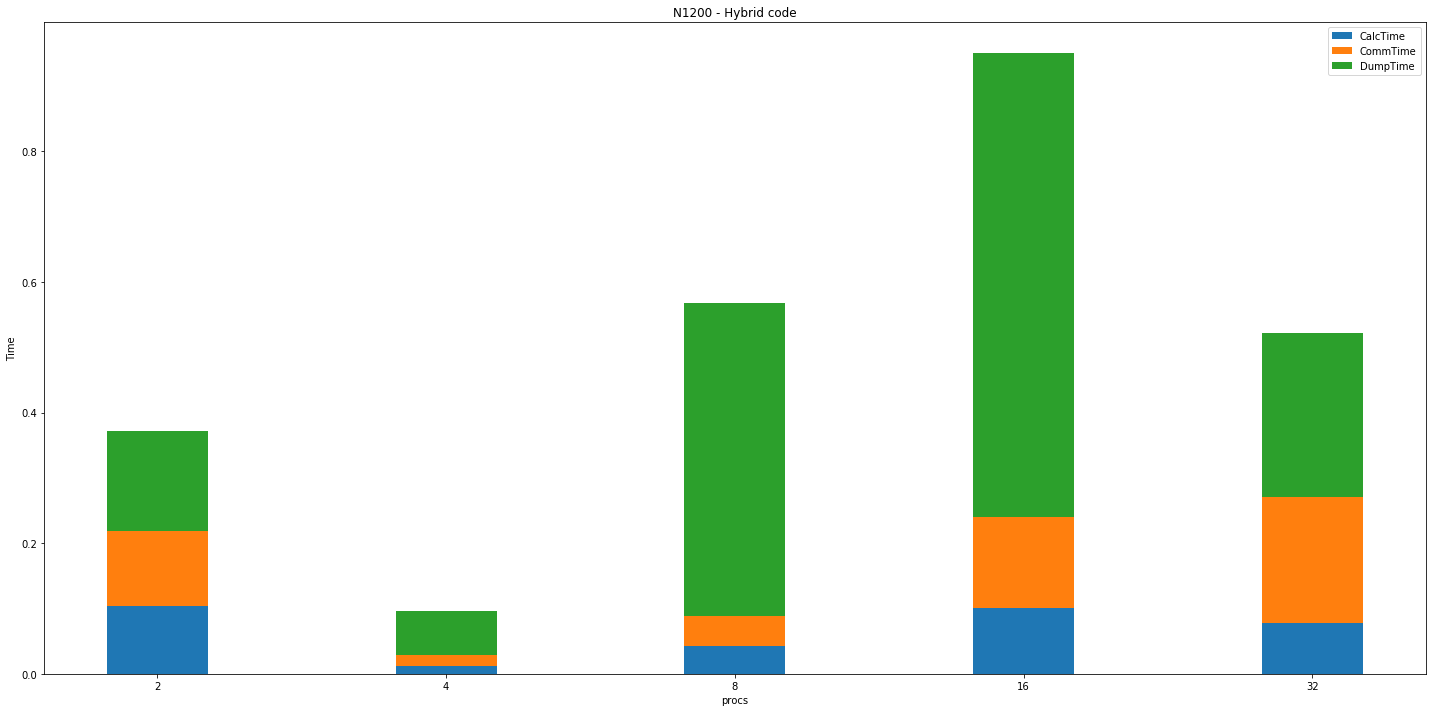

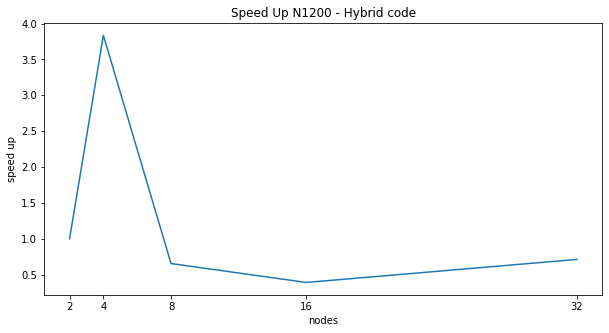

In [8]:
commTime = read_all_times(N12h_path + "/commTime")
totTime = read_all_times(N12h_path + "/totTime")
calcTime = read_all_times(N12h_path + "/calcTime")
dumpTime = read_all_times(N12h_path + "/dumpTime")
totTime, commTime, calcTime, dumpTime = separate_times(totTime, commTime, calcTime, dumpTime)
labels = ["2","4","8","16","32"]
procs = np.asarray([2,4,8,16,32])
title = "N1200 - Hybrid code"
make_plots_times(title,labels,commTime,calcTime, dumpTime)
make_plot_speedup(title, np.asarray(totTime), procs, labels, totTime[0])

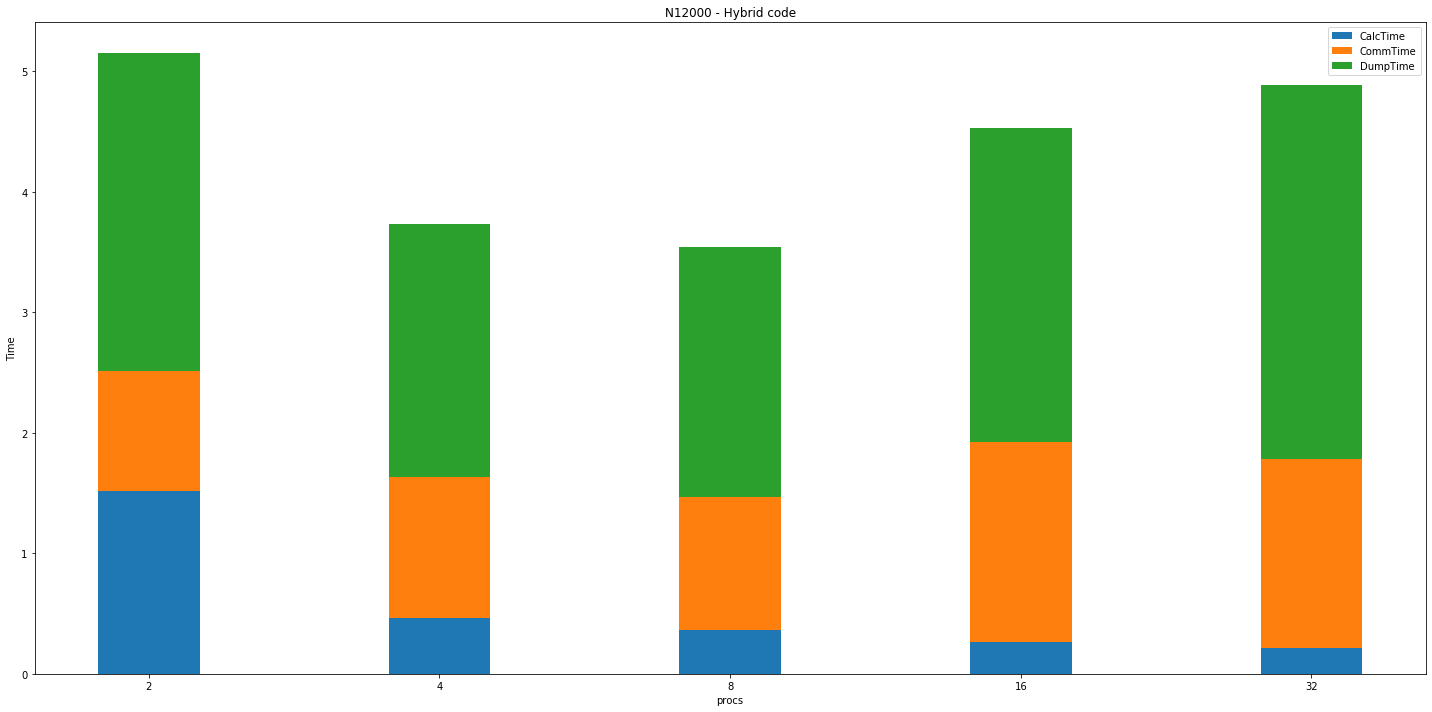

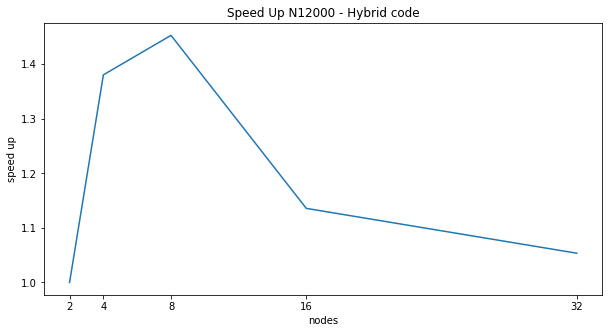

In [9]:
commTime = read_all_times(N12k_path + "/commTime")
totTime = read_all_times(N12k_path + "/totTime")
calcTime = read_all_times(N12k_path + "/calcTime")
dumpTime = read_all_times(N12k_path + "/dumpTime")
totTime, commTime, calcTime, dumpTime = separate_times(totTime, commTime, calcTime, dumpTime)
labels = ["2","4","8","16","32"]
procs = np.asarray([2,4,8,16,32])
title = "N12000 - Hybrid code"
make_plots_times(title,labels,commTime,calcTime, dumpTime)
make_plot_speedup(title, np.asarray(totTime), procs, labels, totTime[0])